### Ingest Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files, drive
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from PIL import Image
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report 
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.cluster import KMeans

In [ ]:
!wget https://github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/archive/refs/heads/main.zip 

--2022-02-14 03:42:49--  https://github.com/erinmcmahon26/MNIST-Digit-Recognizer-Kaggle-Competition/archive/refs/heads/main.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/erinmcmahon26/MNIST-Digit-Recognizer/archive/refs/heads/main.zip [following]
--2022-02-14 03:42:50--  https://github.com/erinmcmahon26/MNIST-Digit-Recognizer/archive/refs/heads/main.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/erinmcmahon26/MNIST-Digit-Recognizer/zip/refs/heads/main [following]
--2022-02-14 03:42:50--  https://codeload.github.com/erinmcmahon26/MNIST-Digit-Recognizer/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connecte

In [ ]:
!unzip "/content/main.zip" -d "/content/output_folder/"

Archive:  /content/main.zip
042da0db4c6fea5b828b48e10791c1b14495c948
replace /content/output_folder/MNIST-Digit-Recognizer-main/MNIST_Digit_Recognizer.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/MNIST_Digit_Recognizer.ipynb  
replace /content/output_folder/MNIST-Digit-Recognizer-main/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/README.md  
replace /content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: /content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip  
replace /content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: /content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip  


In [ ]:
!unzip "/content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip" -d "/content/output_folder/MNIST-Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/MNIST-Digit-Recognizer-main/test.csv.zip
replace /content/output_folder/MNIST-Digit-Recognizer-main/csvs/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/csvs/test.csv  


In [ ]:
!unzip "/content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip" -d "/content/output_folder/MNIST-Digit-Recognizer-main/csvs"

Archive:  /content/output_folder/MNIST-Digit-Recognizer-main/train.csv.zip
replace /content/output_folder/MNIST-Digit-Recognizer-main/csvs/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/output_folder/MNIST-Digit-Recognizer-main/csvs/train.csv  


In [ ]:
df_train = pd.read_csv('/content/output_folder/MNIST-Digit-Recognizer-main/csvs/train.csv')

In [ ]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test = pd.read_csv('/content/output_folder/MNIST-Digit-Recognizer-main/csvs/test.csv')

In [ ]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### EDA

In [ ]:
df_train.isnull().sum()[df_train.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [ ]:
df_test.isnull().sum()[df_test.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

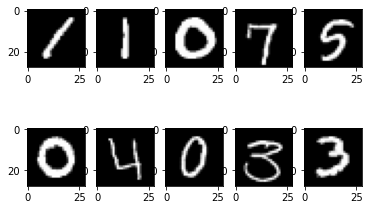

In [ ]:
X = df_train.iloc[:,1:].values / 255 
y = df_train.iloc[:,0].values

fig,ax = plt.subplots(2,5)
for i in range(10):
    nparray = X[i].reshape(28,28)
    image = Image.fromarray(nparray * 255)
    ax[i%2][i//2].imshow(image)
fig.show()

Splitting the training data into X and y variables.

In [ ]:
y = df_train['label'].values
X = df_train.drop(columns = ['label']).values

In [ ]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


label is 9


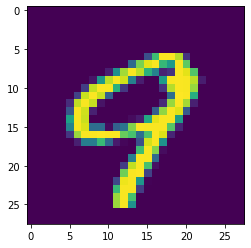

In [ ]:
X_square = X.reshape(-1, 28, 28)
index = 100
plt.imshow(X_square[100])
print(f"label is {y[100]}")

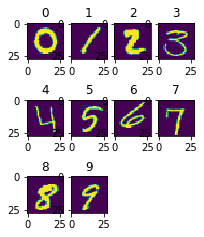

In [ ]:
nptrain = np.array(df_train)
plt.figure(figsize=(3,4))
for j in range(10):
    for i in range(len(nptrain)):
        if nptrain[i][0] == j:
            plt.subplot(3,4,j+1)
            plt.imshow(nptrain[i][1:].reshape(28,28), interpolation='nearest')
            plt.title(j)
            break
plt.show()

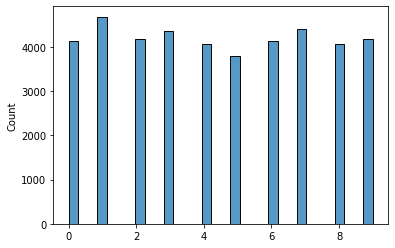

In [ ]:
sns.histplot(y)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]))

This is showing that we have 10 unique values ranging from 0-9. Showing a fairly even distribution.

In [ ]:
df_train['pixel34'].value_counts()

0      41995
85         1
2          1
157        1
132        1
67         1
Name: pixel34, dtype: int64

In [ ]:
X_square = X_square / 255.
X = X / 255.

Pixel values can range from 0-255 which corresponds to colors on the screen. Working with large numbers can be hard on the models, dividing by 255 will normalize it. PCA is affected by scale, so we need to scale or normalize prior to running the features through PCA. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

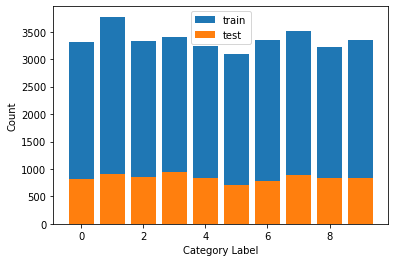

In [ ]:
labels, count = np.unique(y_train, return_counts=True)
plt.bar(labels, count, label = "train")
labels, count = np.unique(y_test, return_counts = True)
plt.bar(labels, count, label = "test")
plt.xlabel("Category Label")
plt.ylabel("Count")
plt.legend()

Still have a good distribution of numbers in our training and testing set. 

#### PCA

In [ ]:
pca = PCA(n_components=0.95)
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

components_: holds the unit vector that defines the first principal component

explained_variance_ratio_: states the proportion of the variance that lies along each principal component

Setting n_components = 0.95 (or other number if desired) to indicating the ratio of variance you would like to keep

PCA is used to extract information from a higher dimensional space by projecting it to a lower dimensional space. Essentially we are looking at the "shadow" of the higher dimensional dataset, this is good for removing noise. Dimensions are features here, the more features you have the higher the dimensionality of the dataset. 

Principle components, from PCA, capture the variance of the data when they are projected onto an axis. They have both magnitude and direction. The direction is determined by the eigenvectors of the correlation matrix and the eigenvalues determine the magnitude within the subspace. The eigenvectors form the axes for the smaller subspace. Then the eigenvalue related to that eigenvector, will tell us the magnitude (how much variance) that the eigenvector has. These in combination give us the principle components. The first principle component holds the most variance. Each subsequent principal component is perpendicular to the one prior to it and holds less variance. 

In [ ]:
x_train_pca.shape

(33600, 153)

PCA took us from 785 features down to 153 features, stating that 153 features represent 95% of the variance in the data. 

Text(0, 0.5, 'Explained Variance')

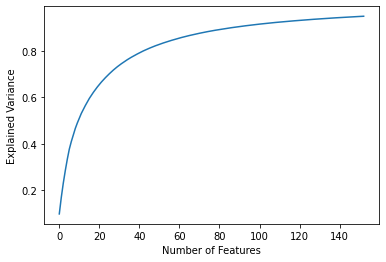

In [ ]:
plt.plot(cumsum)
plt.xlabel("Number of Features")
plt.ylabel("Explained Variance")

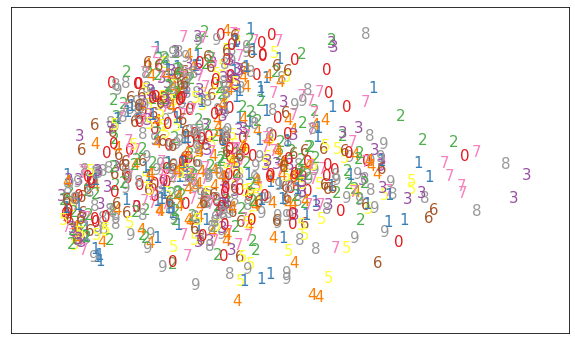

In [ ]:
def plot_components(X, y):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(10, 6))
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), 
                 color=plt.cm.Set1(y[i]), 
                 fontdict={'size': 15})

    plt.xticks([]), plt.yticks([]), plt.ylim([-0.1,1.1]), plt.xlim([-0.1,1.1])
plot_components(x_train_pca[:1000], y[:1000])

### Models

In [ ]:
def model_metrics(model, xtest, ytest):
  start = time.time()
  y_pred = model.predict(xtest)
  end = time.time()
  cm = confusion_matrix(ytest, y_pred)
  print("Accuracy Score:", accuracy_score(ytest, y_pred))
  print("Report:", classification_report(ytest, y_pred))
  print(f"Elapsed Time: {end - start: .4f} second")
  sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")

#### Random Forest

##### All Features Included

Accuracy Score: 0.965
Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       816
           1       0.99      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.94      0.95       937
           4       0.96      0.97      0.96       839
           5       0.97      0.95      0.96       702
           6       0.97      0.98      0.97       785
           7       0.97      0.96      0.96       893
           8       0.96      0.96      0.96       835
           9       0.93      0.95      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.97      0.97      8400
weighted avg       0.97      0.96      0.96      8400

Elapsed Time:  0.4430 second


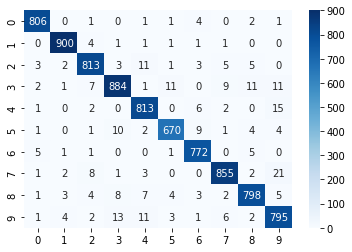

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

model_metrics(rfc, x_test, y_test)

In [ ]:
test_features = df_test.values/255

In [ ]:
# create submission:
#test_pred1 = rfc.predict(test_features)
#output1 = pd.DataFrame({'ImageId': df_test.index+1,
#                        'label': test_pred1})
#output1.to_csv("RF_nopca.csv", index=False)

##### Features from PCA

Accuracy Score: 0.9386904761904762
Report:               precision    recall  f1-score   support

           0       0.96      0.97      0.97       816
           1       0.98      0.98      0.98       909
           2       0.94      0.93      0.94       846
           3       0.91      0.91      0.91       937
           4       0.94      0.95      0.94       839
           5       0.91      0.93      0.92       702
           6       0.95      0.97      0.96       785
           7       0.95      0.94      0.94       893
           8       0.93      0.89      0.91       835
           9       0.92      0.91      0.91       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400

Elapsed Time:  0.3272 second


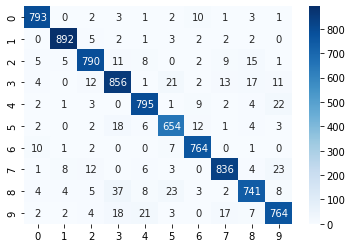

In [ ]:
rfc = RandomForestClassifier()
rfc_pca = rfc.fit(x_train_pca, y_train)

model_metrics(rfc_pca, x_test_pca, y_test)

After applying the features picked using PCA, the model was able to train more quickly (about 0.11 seconds faster) but the overall accuracy was lower. It is possible that even though PCA can select important features, that the Random Forest Classifier is more capable of selecting features for itself versus having another algorithm do it instead. 

In [ ]:
# pca for test dataset
test_features_pca = pca.transform(test_features)
rf2_pred = rfc_pca.predict(test_features_pca)

In [ ]:
# create submission:
#output2 = pd.DataFrame({'ImageId': df_test.index+1,
#                        'label': rf2_pred})
#output2.to_csv("RF_pca4.csv", index=False)

#### K-Means Clustering

In [ ]:
# mapping labels from cluster to original labels
def get_reference_dict(clusters,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label

    
# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

Accuracy Score: 0.012261904761904762
Report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       816
           1       0.00      0.00      0.00       909
           2       0.00      0.00      0.00       846
           3       0.01      0.01      0.01       937
           4       0.05      0.04      0.05       839
           5       0.03      0.06      0.05       702
           6       0.01      0.01      0.01       785
           7       0.00      0.00      0.00       893
           8       0.01      0.00      0.00       835
           9       0.00      0.00      0.00       838

    accuracy                           0.01      8400
   macro avg       0.01      0.01      0.01      8400
weighted avg       0.01      0.01      0.01      8400

Elapsed Time:  0.0431 second


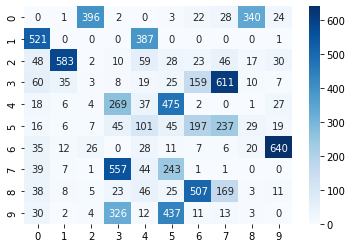

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(x_train)

model_metrics(kmeans, x_test, y_test)

In [ ]:
clusters = kmeans.predict(x_train)

In [ ]:
reference_labels = get_reference_dict(clusters, y_train)
predicted_labels = get_labels(clusters, reference_labels)
print(reference_labels)
print(accuracy_score(predicted_labels, y_train))

{0: 1, 1: 2, 2: 0, 3: 7, 4: 1, 5: 4, 6: 8, 7: 3, 8: 0, 9: 6}
0.5888392857142857


In [ ]:
cm = confusion_matrix(y_train, predicted_labels)
cm_df = pd.DataFrame(cm, columns = ["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4", "Predicted 5", "Predicted 6", "Predicted 7", "Predicted 8", "Predicted 9"], 
                     index = ["Actual 0", "Actual 1", "Actual 2", "Actual3", "Actual 4", "Actual 5", "Actual 6", "Actual 7", "Actual 8", "Actual 9"])
cm_df

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 0,2965,12,7,111,21,0,101,6,93,0
Actual 1,0,3747,3,5,5,0,4,4,7,0
Actual 2,64,418,2345,182,93,0,108,39,82,0
Actual3,94,285,117,2192,101,0,38,23,564,0
Actual 4,13,252,20,0,1785,0,106,1045,12,0
Actual 5,178,559,6,1023,196,0,55,191,885,0
Actual 6,129,292,39,13,46,0,2775,2,56,0
Actual 7,17,334,24,3,1065,0,5,2055,5,0
Actual 8,42,397,29,612,101,0,25,101,1921,0
Actual 9,42,188,4,38,1661,0,10,1366,41,0


In [ ]:
# create submission:
km_test_preds = kmeans.predict(test_features)
test_predicted_labels = get_labels(km_test_preds, reference_labels)
test_predicted_labels = np.array([int(x) for x in test_predicted_labels])
#output3 = pd.DataFrame({'ImageId': df_test.index+1,
#                        'label': test__predicted_labels})
#output3.to_csv("kmeans.csv", index=False)

### Conculsion

The Random Forest Model performed the best by itself on this dataset. The Random Forest performed worse when used with PCA and this is most likely due to it not receiving the whole dataset (only 95% of the variance) so it had less information to look at. The kmeans clustering did not do as well most likely due to the high variability within the dataset. 